## Book Recommendation System using Peason Co-relation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as war
war.filterwarnings("ignore")
print("Imported")

Imported


In [66]:
## reading the csv files
print("="*100)
print("Importing Books CSV file")
print("-"*100)
books = pd.read_csv("Datasets/Books.csv")
print(f"Shape of the Books CSV File {books.shape}")
print("="*100)
print("Importing Ratings CSV file")
print("-"*100)
ratings = pd.read_csv("Datasets/Ratings.csv")
print(f"Shape of the Ratings CSV File {ratings.shape}")
print("="*100)
print("Importing Users CSV file")
print("-"*100)
users = pd.read_csv("Datasets/Users.csv")
print(f"Shape of the Users CSV File {users.shape}")
print("="*100)

Importing Books CSV file
----------------------------------------------------------------------------------------------------
Shape of the Books CSV File (271360, 8)
Importing Ratings CSV file
----------------------------------------------------------------------------------------------------
Shape of the Ratings CSV File (1149780, 3)
Importing Users CSV file
----------------------------------------------------------------------------------------------------
Shape of the Users CSV File (278858, 3)


In [12]:
print("="*100)
print("Columns in Books")
print("-"*100)
print(f"{books.columns.tolist()}")
print("="*100)
print("Columns in Ratings")
print("-"*100)
print(f"{ratings.columns.tolist()}")
print("="*100)
print("Columns in Users")
print("-"*100)
print(f"{users.columns.tolist()}")
print("="*100)

Columns in Books
----------------------------------------------------------------------------------------------------
['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
Columns in Ratings
----------------------------------------------------------------------------------------------------
['User-ID', 'ISBN', 'Book-Rating']
Columns in Users
----------------------------------------------------------------------------------------------------
['User-ID', 'Location', 'Age']


In [13]:
## checking each of the dataframe's info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [15]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [170]:
books.isnull().sum()
books.dropna(inplace=True)

In [171]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [172]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

### Exploratory Data Analysis

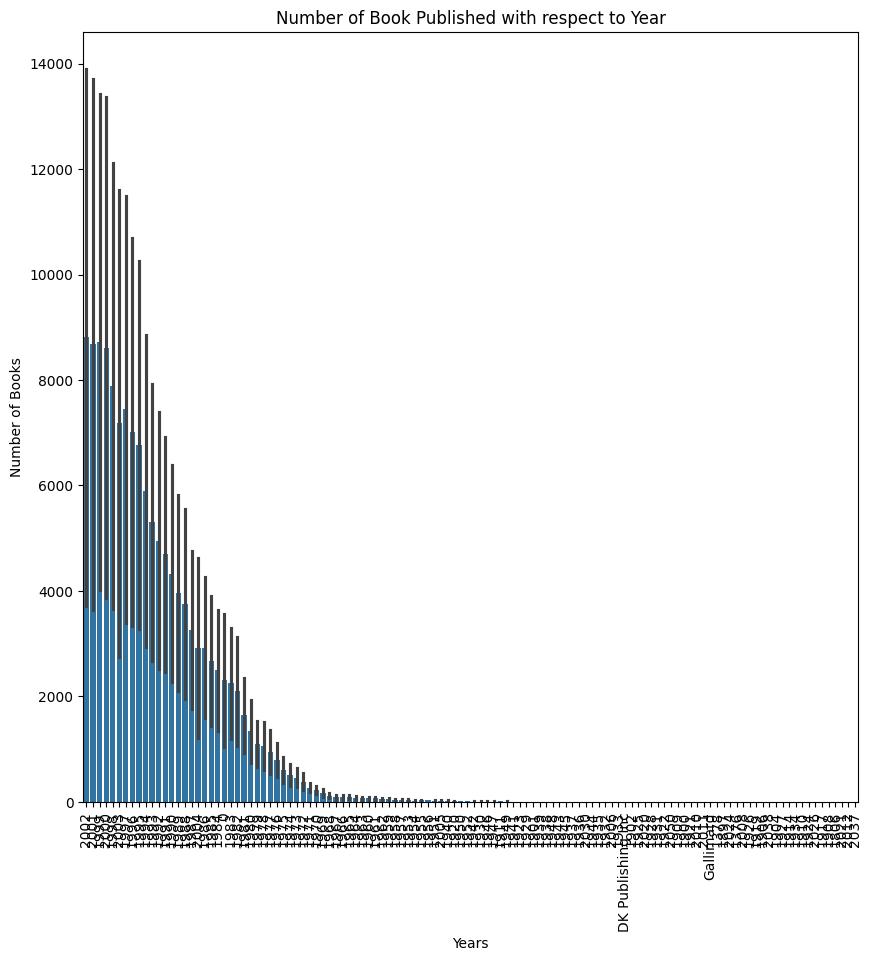

In [26]:
year_count = books["Year-Of-Publication"].value_counts().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(data=year_count, x='index', y='Year-Of-Publication')
plt.title("Number of Book Published with respect to Year")
plt.xlabel("Years")
plt.ylabel("Number of Books")
plt.xticks(rotation=90)
plt.show()

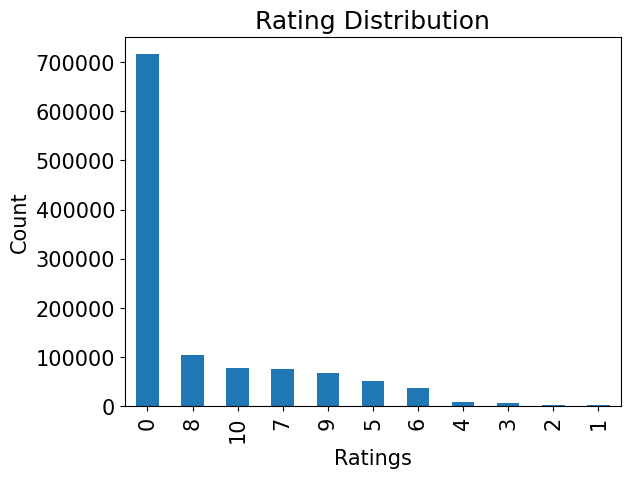

In [33]:
plt.rc('font', size=15)
ratings["Book-Rating"].value_counts(sort=True).plot(kind='bar')
plt.title("Rating Distribution")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

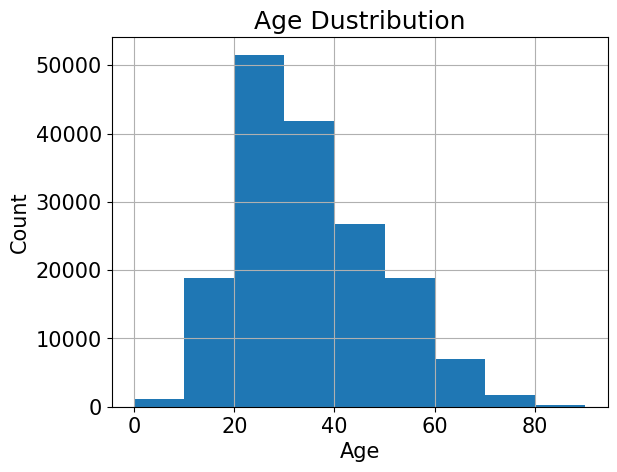

In [36]:
users.Age.hist(bins=[x*10 for x in range(0,10)])
plt.title("Age Dustribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Popularity Based Recommendation

In [173]:
rating_count = pd.DataFrame(ratings.groupby("ISBN")['Book-Rating'].count())
rating_count = rating_count.sort_values('Book-Rating', ascending=False)
rating_count.head()

,Book-Rating
ISBN,
0971880107,365
0316666343,272
0060928336,221
0440214041,218
0385504209,217


##### This is just a recommendation system based on most liked books. It is normally used when we dont know the customer/ user.

In [174]:
## let's give the detailed dataframe for the most rated books
most_rated_books = pd.DataFrame(rating_count.index.tolist()[:5], index=np.arange(5), columns=["ISBN"])
most_rated_books_summary = pd.merge(most_rated_books, books, on="ISBN")
most_rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
3,0440214041,The Pelican Brief,John Grisham,1993,Dell,http://images.amazon.com/images/P/0440214041.0...,http://images.amazon.com/images/P/0440214041.0...,http://images.amazon.com/images/P/0440214041.0...
4,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...


### Recommendation Based on Co-Relation

##### We use Pearson Co-Relation coefficient to measure the linear corelation between two variables, we can take the average rating of the two books and get the recommendation.

In [175]:
average_rating = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].mean())
average_rating['ratingcount'] = pd.DataFrame(ratings.groupby("ISBN")['Book-Rating'].count())
average_rating.sort_values('ratingcount', ascending=False).head()

,Book-Rating,ratingcount
ISBN,,
0971880107,0.436,365
0316666343,3.199,272
0060928336,1.910,221
0440214041,1.885,218
0385504209,3.171,217


In [176]:
average_rating.shape

(207699, 2)

##### we can see that there is blunder, with the two dataframes. We can clearly see that the book which has highest ratings, are not rated or liked, and here the system could faile in getting the correct recommendation.

In [177]:
counts1 = ratings['User-ID'].value_counts()
ratings = ratings[ratings['User-ID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['Book-Rating'].value_counts()
ratings = ratings[ratings['Book-Rating'].isin(counts[counts >= 100].index)]

In [178]:
ratings.shape

(527556, 3)

##### Rating Matrics
    We convert the ratings table to a 2D matrix. The matrix will be sparse because not every user rated every book.

In [179]:
ratings_pivot = ratings.pivot(index='User-ID', columns='ISBN')['Book-Rating']

In [180]:
## List the User-IDs 
userID = ratings_pivot.index
ISBN = ratings_pivot.columns
ratings_pivot.shape

(905, 207699)

In [181]:
## checking the integrity
ratings_pivot.shape[0]==len(userID), ratings_pivot.shape[1]==len(ISBN)

(True, True)

In [182]:
print(ratings_pivot.shape)
ratings_pivot.head()

(905, 207699)


ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
User-ID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
bones_ratings = ratings_pivot['UNGRANDHOMMED']
similar_to_bones = ratings_pivot.corrwith(bones_ratings)
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(average_rating['ratingcount'])
corr_summary[corr_summary['ratingcount']>=300].sort_values('pearsonR', ascending=False).head(10)

,pearsonR,ratingcount
ISBN,,


In [163]:
book_ratings_count = ratings_pivot.notnull().sum(axis=0).sort_values(ascending=False)
print(book_ratings_count.head(10))  # Top 10 books with the most ratings

ISBN
0971880107    365
0316666343    272
0060928336    221
0440214041    218
0385504209    217
044021145X    204
0440211727    203
067976402X    195
0446672211    183
059035342X    183
dtype: int64


In [184]:
import pandas as pd

# Step 1: Filter Users and Books with Minimum Ratings
counts1 = ratings['User-ID'].value_counts()
ratings = ratings[ratings['User-ID'].isin(counts1[counts1 >= 50].index)]  # Reduced to 50

counts = ratings['Book-Rating'].value_counts()
ratings = ratings[ratings['Book-Rating'].isin(counts[counts >= 20].index)]  # Reduced to 20

# Step 2: Compute Average Ratings After Filtering
average_rating = ratings.groupby('ISBN')['Book-Rating'].agg(['mean', 'count'])
average_rating.rename(columns={'mean': 'avg_rating', 'count': 'ratingcount'}, inplace=True)

# Step 3: Create Pivot Table
ratings_pivot = ratings.pivot(index='User-ID', columns='ISBN')['Book-Rating']

# Step 4: Compute Correlation with 'UNGRANDHOMMED'
book_name = 'UNGRANDHOMMED'
if book_name in ratings_pivot.columns and ratings_pivot[book_name].notnull().sum() >= 10:  # Check ratings count
    bones_ratings = ratings_pivot[book_name]
    similar_to_bones = ratings_pivot.corrwith(bones_ratings)
    
    # Step 5: Format Correlation Data
    corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
    corr_bones.dropna(inplace=True)

    # Step 6: Join with Rating Counts and Filter
    corr_summary = corr_bones.join(average_rating['ratingcount'])
    recommendations = corr_summary[corr_summary['ratingcount'] >= 300].sort_values('pearsonR', ascending=False).head(10)
    print(recommendations)
else:
    print(f"'{book_name}' has too few ratings for correlation.")


'UNGRANDHOMMED' has too few ratings for correlation.
